In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
X = df[["class", "sex", "embark_town"]]
y = df.survived

In [3]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklego.meta import Thresholder


def make_pipeline(parameters):
    if parameters["sc_variables"] == "all":
        scaler = StandardScaler()
    elif parameters["sc_variables"] is not None:
        scaler = SklearnTransformerWrapper(
            StandardScaler(), variables=parameters["sc_variables"]
        )
    else:
        scaler = "passthrough"

    if parameters["num_method"] is None:
        num_imp = "passthrough"
    else:
        num_imp = MeanMedianImputer(
            imputation_method=parameters["num_method"]
        )

    if parameters["cat_method"] is None:
        cat_imp = "passthrough"
    else:
        cat_imp = CategoricalImputer(
            imputation_method=parameters["cat_method"]
        )

    print(
        f"Entrenamiento para Naive Bayes y threshold = {parameters['threshold']}"
    )
    print("===================================")
    pipe = Pipeline(
        steps=[
            ("cat_imp", cat_imp),
            ("num_imp", num_imp),
            ("ohe", parameters["encoder"]),
            ("sc", scaler),
            (
                "model",
                Thresholder(
                    parameters["model"],
                    threshold=parameters["threshold"],
                ),
            ),
        ]
    )
    return pipe


def make_evaluation(
    model,
    X_train,
    X_test,
    y_train,
    y_test,
):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_precision = precision_score(y_train, y_pred_train)
    test_precision = precision_score(y_test, y_pred)
    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred)

    print(f"Train Accuracy {train_acc}")
    print(f"Test Accuracy {test_acc}")
    print("===================================")
    print(f"Train Precision {train_precision}")
    print(f"Test Precision {test_precision}")
    print("===================================")
    print(f"Train Recall {train_recall}")
    print(f"Test Recall {test_recall}")

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    RocCurveDisplay.from_predictions(y_test, y_pred_proba[:, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Entrenamiento para Naive Bayes y threshold = 0.5
Train Accuracy 0.7844311377245509
Test Accuracy 0.757847533632287
Train Precision 0.7137254901960784
Test Precision 0.6732673267326733
Train Recall 0.7193675889328063
Test Recall 0.7640449438202247


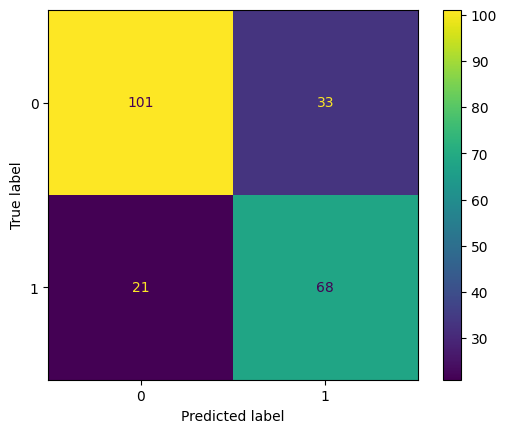

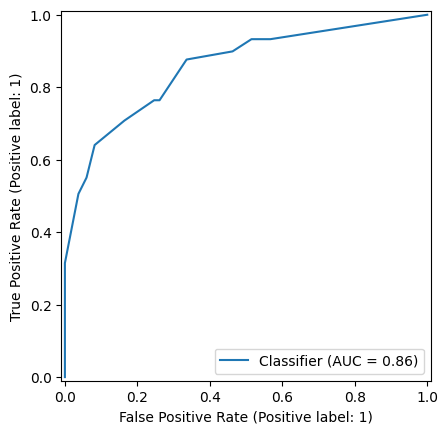

In [5]:
parameters = dict(
    cat_method="frequent",
    num_method=None,
    encoder=OneHotEncoder(),
    threshold=0.5,
    sc_variables=None,
    model=MultinomialNB(),
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Naive Bayes y threshold = 0.5
Train Accuracy 0.7784431137724551
Test Accuracy 0.7488789237668162
Train Precision 0.6996197718631179
Test Precision 0.6601941747572816
Train Recall 0.7272727272727273
Test Recall 0.7640449438202247


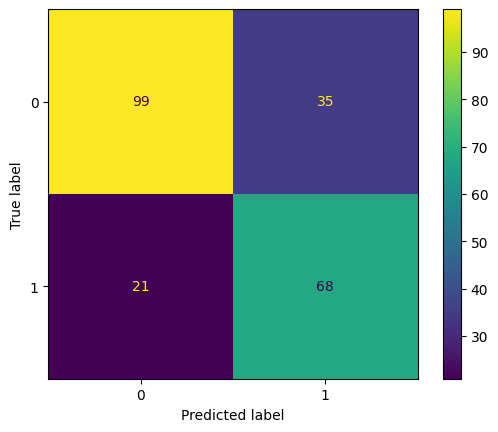

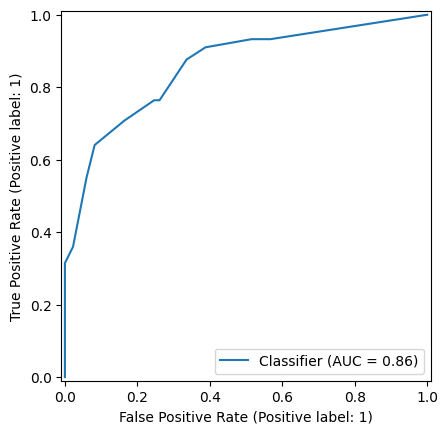

In [6]:
parameters = dict(
    cat_method="frequent",
    num_method=None,
    encoder=OneHotEncoder(),
    threshold=0.5,
    sc_variables=None,
    model=GaussianNB(),
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Naive Bayes y threshold = 0.5
Train Accuracy 0.7784431137724551
Test Accuracy 0.7488789237668162
Train Precision 0.6996197718631179
Test Precision 0.6601941747572816
Train Recall 0.7272727272727273
Test Recall 0.7640449438202247


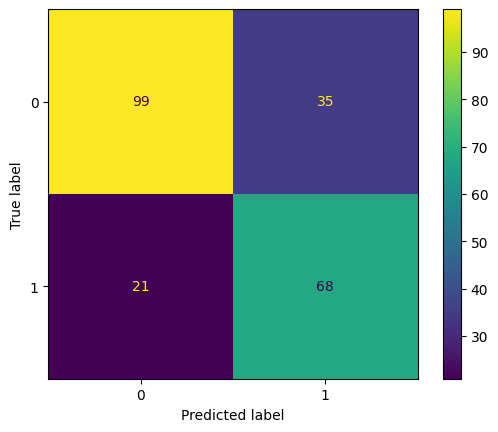

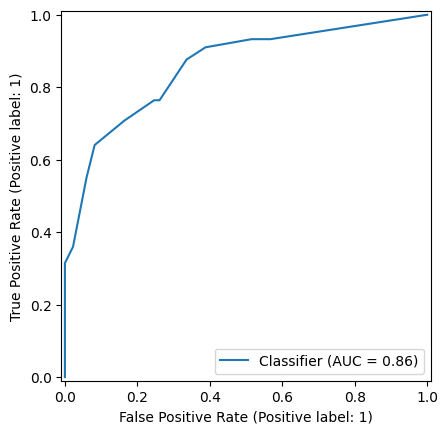

In [7]:
parameters = dict(
    cat_method="frequent",
    num_method=None,
    encoder=OneHotEncoder(),
    threshold=0.5,
    sc_variables="all",
    model=GaussianNB(),
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

In [8]:
X = df[["class", "sex", "embark_town", "age", "fare"]]
y = df.survived

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Entrenamiento para Naive Bayes y threshold = 0.5
Train Accuracy 0.6811377245508982
Test Accuracy 0.7309417040358744
Train Precision 0.6063829787234043
Test Precision 0.7230769230769231
Train Recall 0.4505928853754941
Test Recall 0.5280898876404494


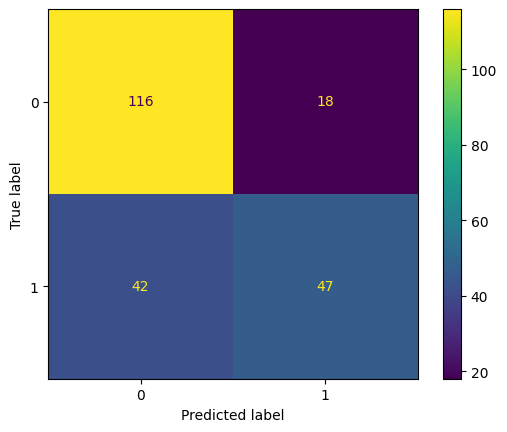

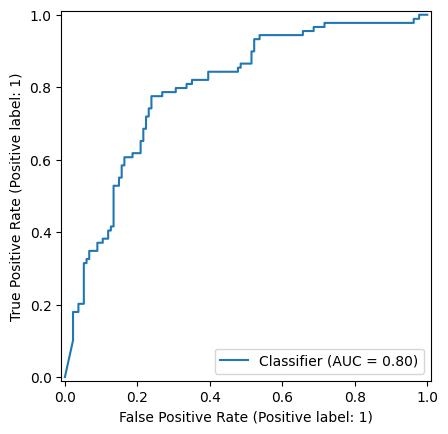

In [9]:
parameters = dict(
    cat_method="frequent",
    num_method="mean",
    encoder=OneHotEncoder(),
    threshold=0.5,
    sc_variables=None,
    model=MultinomialNB(),
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Naive Bayes y threshold = 0.5
Train Accuracy 0.7844311377245509
Test Accuracy 0.7623318385650224
Train Precision 0.7056603773584905
Test Precision 0.6730769230769231
Train Recall 0.7391304347826086
Test Recall 0.7865168539325843


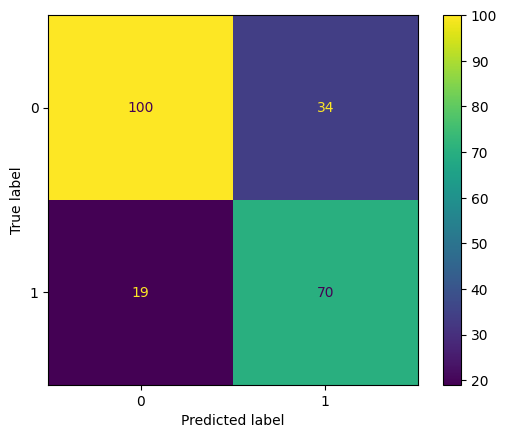

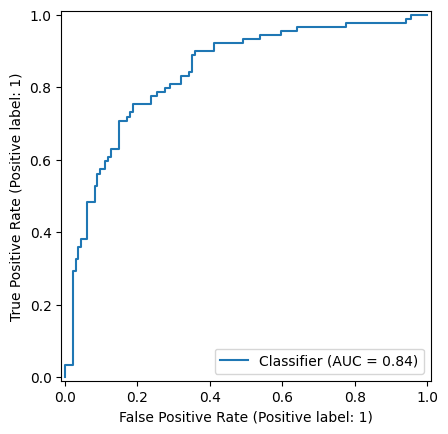

In [10]:
parameters = dict(
    cat_method="frequent",
    num_method="mean",
    encoder=OneHotEncoder(),
    threshold=0.5,
    sc_variables=None,
    model=GaussianNB(),
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)